# Which Mushroom Can You Eat?

### James Capone

### April 2025

<center><img src="mushroom_picture.jpg"/></center>

# Introduction


This data inquiry will be an investigation of Agaricus Lepiota mushrooms. This mushroom subset can differ in characteristic features and measurements, potentially leading to misclassifications of the exact species. This classification error can turn tragic when learning that one major feature difference between Lepiota species is the presence of poison. Some mushrooms within this genus contain lethal amounts of poison when ingested, while other species in the same group can be safely consumed. Having a way to accurately classify Agaricus Lepiota mushrooms can be the difference between life and death. Therefore, **our goal is to create a neural network model that can classify the mushrooms into their correct toxicity group (binary).**

During the model assembly process, we will focus on three neural network variations to determine the effects of model differences in design. All models will be fairly simple Sequential Neural Networks focusing on solving the classification problem with the least amount of neural layers possible. The first design will be a baseline model composing of all the mushroom features. The second model will incorporate Principal Component Analysis (PCA) on the data, determining how this dimensionality reduction method impacts the neural network. The last model has been deemed the Survival Model. I wanted to create a model that could be taken as a potential hiking tool, classifying the lethality of a mushroom one had come across (assuming that every mushroom is within the Agaricus Lepiota family). For the Survival Model, the mushroom dataset had features removed that would require domain knowledge on Agaricus Lepiota mushrooms, specifically the **veil_type** and **ring_type** features. All other mushroom characteristic information can be gathered from any individual with basic senses (sight and smell).


**When designing the model, we have to be mindful of the context of our problem. To reiterate, we are trying to classify mushrooms as poisonous or edible based on the common characteristics of each mushroom type. In order to prevent individuals from eating poisonous mushrooms provided from a false negative model result, we will be trying to maximize the total accuracy**. In some cases, it is beneficial for a machine learning model to retain errors in training, such as the model's ability to generalize better to unseen data. However, for these neural network models, we will aim to maximize accuracy while minding the concept of overfitting. As one will see, we are able to successfully assign all test samples into their correct toxicity groups for each model.


In [1]:
# loading basic packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the Mushroom Data

The mushroom data was provided by Eastern University (my alma mater). It is composed of 8124 rows and 23 columns. Each row corresponds to an individual mushroom observation and each column represents a different feature about the mushroom. 

In order to prepare for the model assembly the mushroom data will be imported, cleaned, split into training and testing groups, transformed, and processed through a Sequential neural network. The results of the model will be visualized using a confusion matrix to ensure its effectiveness in classifying mushrooms as poisonous or edible.

The **target response** is the **class** column. This column holds the information on the poisonous value of each mushroom (e = edible, p = poisonous). The other columns are features of the mushroom that will be used in the neural network model to predict the toxicity of each mushrooms. 


In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

# loading dataset with specified column names

mushroom_data = pd.read_csv('agaricus-lepiota.csv', names = ['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 
                                                            'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape',
                                                            'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring',
                                                            'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type',
                                                            'veil_color', 'ring_number', 'ring_type', 'spore_print_color',
                                                            'population', 'habitat'])

## Exploring the Data

After examining the mushroom dataset, we can determine the data contains zero null values or have been properly handled prior to acquisition. In other words, we are working with a clean dataset.

In [4]:
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [5]:
mushroom_data.describe()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,4,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,5848,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
# '?' was denoted as missing data in the data dictionary

mushroom_data[mushroom_data['stalk_root'] == '?']

# zero rows returned

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat


## Splitting the Data

The **mushroom_data** dataset will be split into a 80% training set and 20% test set. This will ensure that we can test our model using data samples without having to resample new mushrooms.

First, we must separate our target variable, **class**, from the other features.

In [7]:
# mushroom features
features = mushroom_data.drop('class', axis = 1)

# target feature
target = mushroom_data['class']

As seen in the data dictionary, because the representation of poisonous mushrooms is roughly even at 48.2% amongst all mushrooms, there is no need to stratify the target variable during splitting.

In [8]:
from sklearn.model_selection import train_test_split

# splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

## Transforming the Data

After the data has been split, we will need to prepare the data for model insertion. Specifically, we will need change the values from strings (i.e., letters) representing characteristics, to numeric values that can be interpreted by the neural network model. To accomplish this task, we will utilize **One-Hot Encoding** for the mushroom features and **Label Encoding** for the target variable.


In [9]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding training characteristic features
one_encoder = OneHotEncoder(sparse_output = False)

x_train = one_encoder.fit_transform(x_train)

# One-Hot Encoding testing characteristic features

x_test = one_encoder.transform(x_test)

In [10]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding target training feature
lab_encoder = LabelEncoder()

y_train = lab_encoder.fit_transform(y_train)

# Label Encoding target testing feature

y_test = lab_encoder.transform(y_test)

## Assembling Neural Network

Now that our training data has been prepared in the desired format, we will begin assembling the base neural network model. Our model will be a Sequential Neural Network that consists of one input layer and one output layer.

Because we are looking to classify the mushroom as either poisonous or edible, we will be building a neural network designated for binary classification.

In [11]:
x_train.shape

(6499, 116)

Since our training data (**x_train**) now contains 116 columns, due to One-Hot Encoding, the input layer for the neural network will require 116 input neurons.

# Base Model

In [12]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


# building the binary classification neural network
model = Sequential()
model.add(Dense(1, activation = 'sigmoid', input_dim = 116))

# compile neural network model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Based on the specifications for the neural network parameters (one input layer and one output layer), there are 117 trainable parameters in the model.

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 117       
                                                                 
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


### Fitting the Model

Now that the binary classification model has been assembled, the model will be fitted using the training and testing data.

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_accuracy', patience = 10, restore_best_weights = True)

In [15]:
%%time
%%capture
hist = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 50, batch_size = 30, callbacks = [early_stop])

Epoch 1/50


2025-05-17 15:25:07.513187: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


217/217 [==============================] - 0s 685us/step - loss: 0.5268 - accuracy: 0.8081 - val_loss: 0.3710 - val_accuracy: 0.9120
Epoch 2/50
217/217 [==============================] - 0s 384us/step - loss: 0.3079 - accuracy: 0.9057 - val_loss: 0.2489 - val_accuracy: 0.9169
Epoch 3/50
217/217 [==============================] - 0s 376us/step - loss: 0.2208 - accuracy: 0.9221 - val_loss: 0.1854 - val_accuracy: 0.9446
Epoch 4/50
217/217 [==============================] - 0s 388us/step - loss: 0.1703 - accuracy: 0.9538 - val_loss: 0.1457 - val_accuracy: 0.9742
Epoch 5/50
217/217 [==============================] - 0s 382us/step - loss: 0.1370 - accuracy: 0.9741 - val_loss: 0.1182 - val_accuracy: 0.9822
Epoch 6/50
217/217 [==============================] - 0s 401us/step - loss: 0.1136 - accuracy: 0.9809 - val_loss: 0.0985 - val_accuracy: 0.9852
Epoch 7/50
217/217 [==============================] - 0s 381us/step - loss: 0.0964 - accuracy: 0.9840 - val_loss: 0.0838 - val_accuracy: 0.9895
Epo

## Visualizing the Base Model Results

We will utilize a confusion matrix to determine the base model's accuracy in correctly assigning mushrooms to their associated target label, poisonous or edible. 

51/51 [==============================] - 0s 236us/step


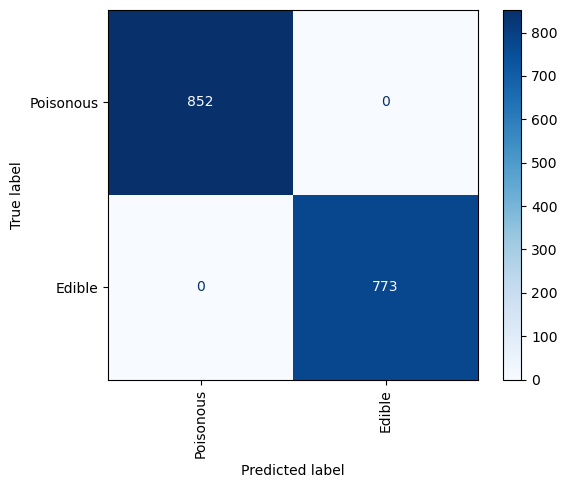

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

sns.reset_orig()
y_predicted = model.predict(x_test) > 0.5
labels = ['Poisonous', 'Edible']
cmd.from_predictions(y_test, y_predicted, display_labels = labels, cmap = 'Blues', xticks_rotation = 'vertical')

In [17]:
train_accuracy = model.evaluate(x_train, y_train)
test_accuracy = model.evaluate(x_test, y_test)

51/51 [==============================] - 0s 280us/step - loss: 0.0136 - accuracy: 1.0000


[]

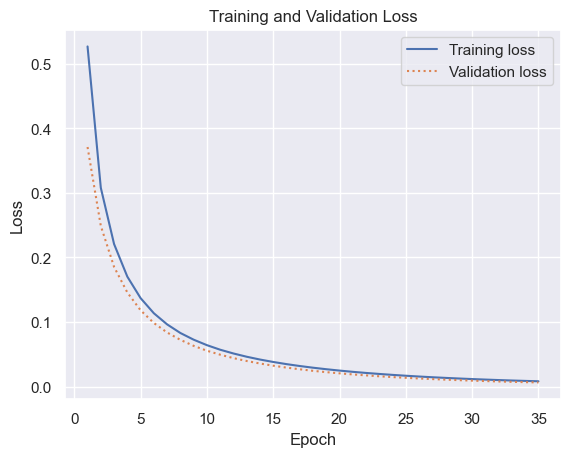

In [18]:
sns.set()

acc = hist.history['loss']
val = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label = 'Training loss')
plt.plot(epochs, val, ':', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.plot()

Our Base model preforms, as expected, with 100% accuracy in classifying the unseen mushrooms to the correct toxicity level. 

# PCA (Principal Component Analysis) Model

We will repeat the model ensembly process (although some steps are not neccessary) to build a new Sequential Neural Network model using a PCA version of our mushroom data. Applying a Principal Component Analysis (PCA) to the dataset will reduce the dimensions of the data (i.e., reduce columns) but will retain the information held within those data structures. We will retain 95% of the variance within the data for PCA application. As stated, the PCA model process will begin with transforming the mushroom features in **x_train** and **x_test**, reducing its dimensions. 

In [19]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
from sklearn.decomposition import PCA

# instantiate PCA class
pca = PCA(n_components = 0.95, random_state = 0)

# PCA x_train
pca_x_train = pca.fit_transform(x_train)

# PCA x_test
pca_x_test = pca.transform(x_test)


We will now assemble the Sequential Neural Network for binary classification using the PCA data. After many tests and model/fitting adjustments, the highest validation accuracy that was achieved by the model was ~99% for the PCA data. As stated previously, the PCA model required an additional layer containing **2 neurons** and **relu activation** in order to achieve perfect accuracy. 

Additionally, since we reduced the dimensions of the mushroom dataset from PCA, the **input_dim** parameter will also be different. This is due to the fact that PCA is a method for **reducing dimensions**, specifically in reducing the number of columns. This method of data transformation can help with a machine learning model's efficiency (i.e., increase speed) and aid in generalization, thus reducing the risk of overfitting.

In the code block below, the PCA data now contains **40** columns, rather than **116 columns** seen in the data used for the original model which was the result of One-Hot Encoding. Therefore, this requires the **input_dim** to be set to **40**.

In [21]:
pca_x_train.shape

(6499, 40)

In [22]:
# building the PCA binary classification neural network
pca_model = Sequential()
pca_model.add(Dense(2, activation = 'relu', input_dim = 40))
pca_model.add(Dense(1, activation = 'sigmoid'))


# compile neural network model
pca_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [23]:
pca_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 82        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


The PCA neural network model possessed 85 trainable parameters.

### Fitting the PCA Model

Once again, we will fit the PCA neural network model using the same parameters set in the training of the base model.

In [24]:
%%time
%%capture
hist = pca_model.fit(pca_x_train, y_train, validation_data = (pca_x_test, y_test), epochs = 50, batch_size = 30, callbacks = [early_stop])

CPU times: user 5.06 s, sys: 677 ms, total: 5.74 s
Wall time: 4.49 s


## Visualizing PCA Model Results

We will use a confusion matrix, similar to before, to see how accurately the PCA model classifys mushrooms to their correct target label (poisonous or edible).

(If your results do not show perfect accuracy, restart the kernel and run all cells again.)

51/51 [==============================] - 0s 246us/step


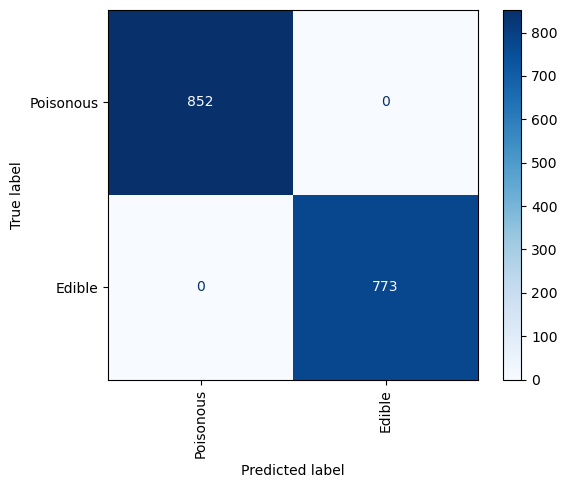

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

sns.reset_orig()
y_predicted = pca_model.predict(pca_x_test) > 0.5
labels = ['Poisonous', 'Edible']
cmd.from_predictions(y_test, y_predicted, display_labels = labels, cmap = 'Blues', xticks_rotation = 'vertical')

In [26]:
train_accuracy = pca_model.evaluate(pca_x_train, y_train)
test_accuracy = pca_model.evaluate(pca_x_test, y_test)

51/51 [==============================] - 0s 268us/step - loss: 0.0069 - accuracy: 1.0000


[]

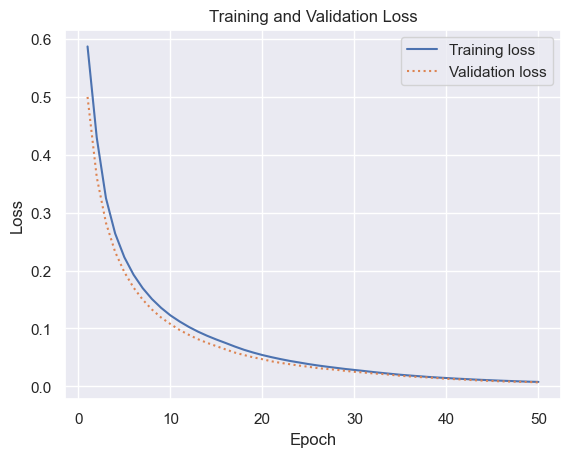

In [27]:
sns.set()

acc = hist.history['loss']
val = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label = 'Training loss')
plt.plot(epochs, val, ':', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.plot()

Once again, our PCA model achieves the desired accuracy of 100%. 

Although, it can be stated that the PCA model may generalize better to mushrooms dissimilar to the mushrooms present in the training set due to the data transformation.

# The Survival Model

The last model that will be prepared and assembled is the **Survival model**. As alluded to previously, this model will have the same data structure as the Base model, exluding the **veil_type** and **ring_type** mushrooms features. The veil types includes options of "universal" or "partial", whereas the ring types include options such as "cobwebby", "evanescent", "flaring", and more (see data dictionary for all options). While some of these charateristics could be deduced, for experimental purposes we will exclude these mushroom attributes. All other listed features about the mushroom can be gathered from the mushroom itself or the environment it was found in.

Again, we will be One-Hot Encoding the feaures and Label Encoding the target label (**class**) to ensure the neural network model can read the data. Prior to such data transformations, the first mushroom observation in the dataset will be excluded and saved to test the model post assembly. Although this form of model testing is already achieved when fitting the model to the train and test sets, I wanted to simulate a new mushroom sample being tested, as would be done in the natural context of the Survival model.

In [28]:
mushroom_data

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,e,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,e,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,e,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,b,s,k,w,w,p,w,o,e,w,v,l


In [29]:
# taking sample for model testing later
sample = mushroom_data.head(1)

In [30]:
# mushroom features, minus "veil_type", "ring_type", and "class"
features = mushroom_data.drop(['veil_type', 'ring_type', 'class'], axis = 1)

# separating target feature
target = mushroom_data['class']

In [31]:
features.shape

(8124, 20)

### Preparing Survival Model

In [32]:
# splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

In [33]:
# # One-Hot Encoding training characteristic features
one_encoder = OneHotEncoder(sparse_output = False)

survival_x_train = one_encoder.fit_transform(x_train)

# One-Hot Encoding testing characteristic features

survival_x_test = one_encoder.transform(x_test)

In [34]:
# Label Encoding target training feature
lab_encoder = LabelEncoder()

y_train = lab_encoder.fit_transform(y_train)

# Label Encoding target testing feature

y_test = lab_encoder.transform(y_test)

In [35]:
survival_x_train.shape

(6499, 110)

In [36]:
# building Survival neural network model
survival_model = Sequential()

survival_model.add(Dense(1, activation = 'sigmoid', input_dim = 110))

survival_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### Fitting the Survival Model

In [37]:
%%time
%%capture
hist = survival_model.fit(survival_x_train, y_train, validation_data = (survival_x_test, y_test), epochs = 50, batch_size = 30, callbacks = [early_stop])

CPU times: user 3.56 s, sys: 698 ms, total: 4.26 s
Wall time: 3.05 s


## Visualizing Survival Model Results

51/51 [==============================] - 0s 239us/step


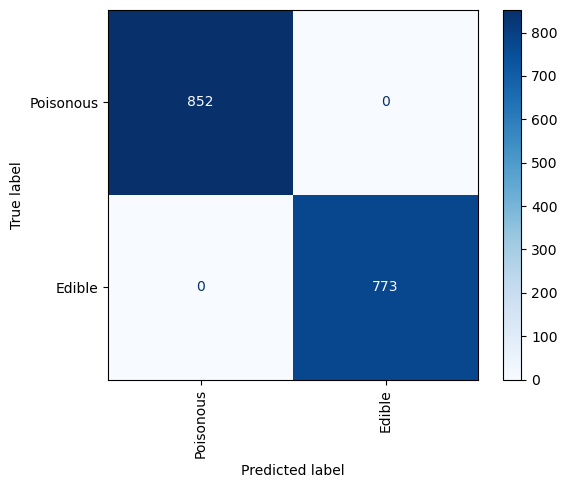

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

sns.reset_orig()
y_predicted = survival_model.predict(survival_x_test) > 0.5
labels = ['Poisonous', 'Edible']
cmd.from_predictions(y_test, y_predicted, display_labels = labels, cmap = 'Blues', xticks_rotation = 'vertical')

In [39]:
train_accuracy = survival_model.evaluate(survival_x_train, y_train)
test_accuracy = survival_model.evaluate(survival_x_test, y_test)

51/51 [==============================] - 0s 266us/step - loss: 0.0169 - accuracy: 1.0000


[]

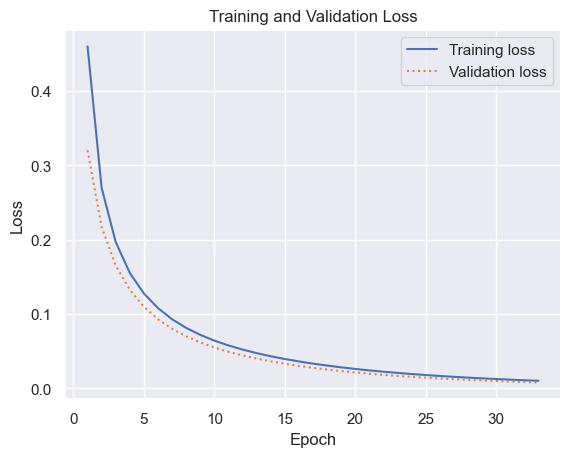

In [40]:
sns.set()

acc = hist.history['loss']
val = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label = 'Training loss')
plt.plot(epochs, val, ':', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.plot()

The Survival model correctly placed all mushrooms into the correct toxicity group (i.e., 100% accuracy).

### Testing the "New" Mushroom Sample

The sample mushroom that we've "collected" is noted as being poisonous, seen below with "p" under **class**. In order to test the sample, it will need to undergo the same data transformations seen for the Base and Survival models.

In [41]:
sample

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u


In [42]:
# preparing sample from earlier for testing
sample_label = sample['class']
sample_features = sample.drop(['class', 'ring_type', 'veil_type'], axis = 1)



sample_label = lab_encoder.transform(sample_label)
sample_features = one_encoder.transform(sample_features)


### Prediction

The model predicts that the sample is indeed **poisonous** as seen when we transform the prediction variable to its original data state, resulting in "p" for poison.

In [43]:
prediction = (survival_model.predict(sample_features) > 0.50).astype(int)
prediction

1/1 [==============================] - 0s 6ms/step


array([[1]])

In [44]:
sample_label

array([1])

In [45]:
lab_encoder.inverse_transform(prediction)

array(['p'], dtype=object)

# Final Results

Based on the results, each model was able to classify the test mushroom sets with **100% accuracy** as desired. However, the PCA model required an additional network layer, containing two neurons, in order to achieve the desired accuracy with the same fitting parameters as the other models. Additionally, the PCA model had a roughly half second faster fitting time than the other model designs. Not surprisingly, the Survival Model was able to correctly identify a poisonous mushroom sample that was excluded from the dataset prior to data preparation. 

Although overfitting the data is a major concern, the loss visualizations confirm that there is no immediate call for overfitting. This can be seen the line chart visuals as both the loss and validation_loss metrics do not cross and continue their steady descent in parallel. 

# Conclusion

When looking at ways to improve upon these models, the model design and infrastructure requires expansion in order to streamline overall operations. This is particularly essential for the Survival model which required the data to be transformed using One-Hot Encoding and Label Encoding before classification could be conducted. To improve effectiveness as a hiking tool, a data pipeline can be developed using sklearn’s pipeline packages along with KerasClassifier, for example, to make the necessary data transformations, execute the model, then receive its prediction upon initial data entry.

Additionally, future inquiries could incorporate other mushroom species that are poisonous and edible. As alluded to, the expanding neural network models could then be developed into an app that could classify a mushroom simply by taking a picture of it. This could be done using Convolutional Neural Networks to detect and classify the mushroom in the picture. This app could serve incredibly useful for individuals who do not possess adequate sight or smell to clearly gather mushroom features themselves.

Overall, this project incorporated fundamental neural network concepts, along with model variations to see if perfect accuracy was achievable is relatively similar ways. Although very basic, these models can be expanded upon to innovate technology in the niche topic of mushroom identification for practical applications as discussed. 
